### A quick exploration of the example dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the source data from Kaggle
url="https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
df=pd.read_csv(url)
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Keep only a few columns, and drop missing values
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Name', 'SibSp']]
df.dropna(how='any', inplace=True);
df.shape

(712, 8)

In [5]:
# Let's spell out the port of embarcation
df.loc[(df['Embarked']=='C') , 'Embarked']='Cherbourg'
df.loc[(df['Embarked']=='Q') , 'Embarked']='Queenstown'
df.loc[(df['Embarked']=='S') , 'Embarked']='Southampton'
df['Embarked'].value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: Embarked, dtype: int64

In [6]:
# Convert Pclass to a numeric format, and sort it
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce').fillna(0).astype(np.int64);
print(df['Pclass'].dtype)
df['Pclass'].value_counts().sort_index()

int64


1    184
2    173
3    355
Name: Pclass, dtype: int64

## Basic value counts

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Name,SibSp
0,0,3,male,22.0,7.2500,Southampton,"Braund, Mr. Owen Harris",1
1,1,1,female,38.0,71.2833,Cherbourg,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,1,3,female,26.0,7.9250,Southampton,"Heikkinen, Miss. Laina",0
3,1,1,female,35.0,53.1000,Southampton,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,0,3,male,35.0,8.0500,Southampton,"Allen, Mr. William Henry",0


In [8]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Name',
       'SibSp'],
      dtype='object')

In [9]:
df['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [10]:
df['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [11]:
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [12]:
df['Age'].mean()

29.64209269662921

In [13]:
df['Embarked'].value_counts()
# (C = Cherbourg; Q = Queenstown; S = Southampton)

Southampton    554
Cherbourg      130
Queenstown      28
Name: Embarked, dtype: int64

## Visualizations

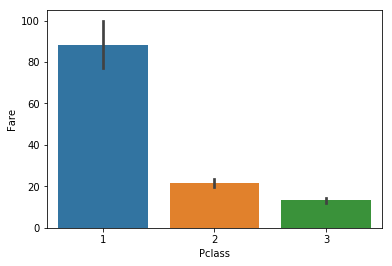

In [14]:
sns.barplot(x='Pclass', y='Fare', data=df);

C:\Users\alasseter\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


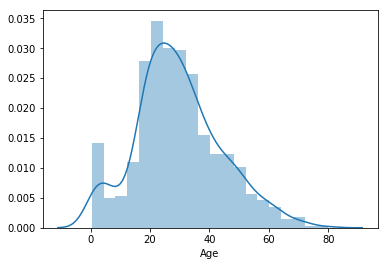

In [15]:
# histogram
sns.distplot(df['Age']);

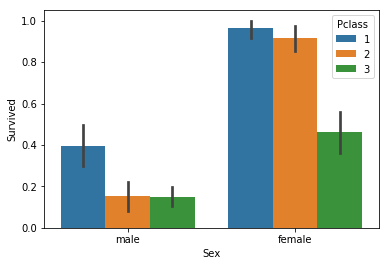

In [16]:
# Comparison barchart
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df);

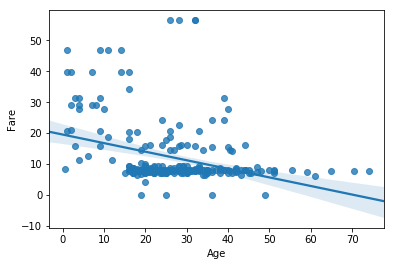

In [17]:
# scatter 
sns.regplot(x='Age', y='Fare', data=df.loc[(df['Pclass']==3) & 
                                           (df['Sex']=='male')], fit_reg=True)

In [18]:
sex_survive=df.groupby(['Sex', 'Pclass']).Survived.mean()
sex_survive=sex_survive*100
my_list=list(sex_survive)
my_list

[96.3855421686747,
 91.8918918918919,
 46.07843137254902,
 39.603960396039604,
 15.151515151515152,
 15.019762845849801]

In [19]:
# Convert to csv
df.to_csv('titanic.csv', index=False)